In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.utils import shuffle

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
# df.head()

(159571, 30)


In [3]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'category', 'rating', 'clean',
       'comment_text_s', 'comment_text_f', 'token_clean', 'sent_token',
       'polarity_sentence', 'polarity_comment', 'polarity_comment_s',
       'word_count', 'char_count', 'char_count_s', 'polarity_min',
       'polarity_max', 'polarity_mean', 'avg_word_length', 'stop_word_count',
       'hashtag_count', 'numeric_count', 'upper_count', 'comment_text_clean'],
      dtype='object')

In [5]:
df_t = df[df['rating']>0]

df_t['total'] = df_t['toxic']+df_t['severe_toxic'] + df_t['obscene'] + df_t['threat']+df_t['insult']+df_t['identity_hate']

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_t.comment_text[0]

", I hope your retarded kids get anal raped and murdered for having such a fag as a father. I'm gonna fuck your fat wife and trow her over the bridge. Consider yourself happy, another useful editor of Wikiepia retired. I see more users retired everyday. Don't even dare removing this you peace of shit, I do what ever the fuck I want with my talk page. Report all you want old cunt, I no longer give a fuck. And don't fucking leave a NPA warning template, just block me. That's what you do best."

In [6]:
df_t.comment_text_clean[0]

'hope retarded kid get anal raped murdered fag father im gonna fuck fat wife trow bridge consider happy another useful editor wikiepia retired user retired everyday even dare removing peace shit ever fuck want report want old cunt longer give fuck fucking leave npa warning template block thats best'

In [5]:
# df_t.columns

In [6]:
df_A = df_t[['rating','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate','total']]
df_A = df_A[df_A['rating']>0]
df_A = df_A.groupby('rating').sum()

df_A['%To'] = df_A['toxic'] / df_A['total']
df_A['%ST'] = df_A['severe_toxic'] / df_A['total']
df_A['%Ob'] = df_A['obscene'] / df_A['total']
df_A['%Th'] = df_A['threat'] / df_A['total']
df_A['%IH'] = df_A['identity_hate'] / df_A['total']
df_A['%In'] = df_A['insult'] / df_A['total']

In [7]:
# df_A

In [8]:
df_A.total.sum()

35098

In [9]:
# df_A['%To'] = df_A['toxic'] / df_A['total']
# df_A['%ST'] = df_A['severe_toxic'] / df_A['total']
# df_A['%Ob'] = df_A['obscene'] / df_A['total']
# df_A['%Th'] = df_A['threat'] / df_A['total']
# df_A['%IH'] = df_A['identity_hate'] / df_A['total']
# df_A['%In'] = df_A['insult'] / df_A['total']
df_A['rating'] = df_A.index
# df_A['rating2'] = df_A.index
# df_A = df_A.set_index('rating2')
# df_A

In [10]:
# df_A = df_A.append(df.sum(numeric_only=True), ignore_index=True)


In [11]:
# df_A

In [12]:
# df_A['IH%rating'] = df_A['identity_hate'].apply(lambda x: )
# df_A['identity_hate'].hist(by=df_A['rating'])

In [13]:
# df_A.columns

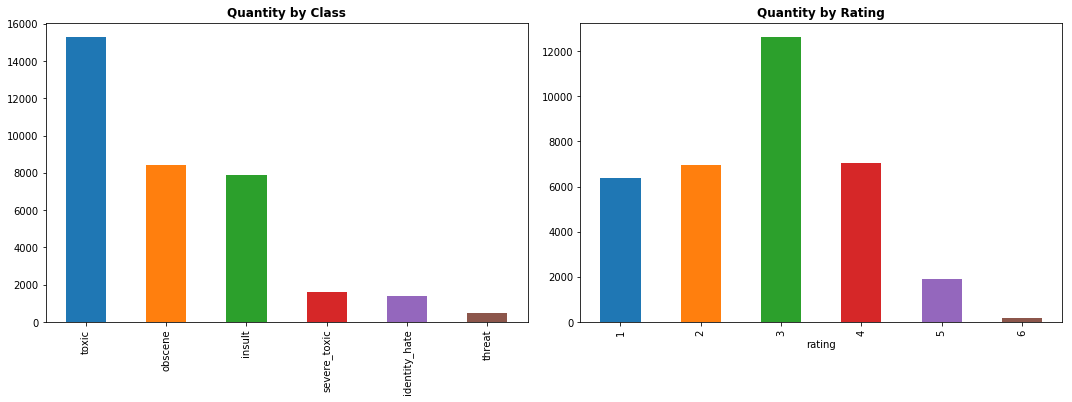

In [14]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,2,1)
df_A1 = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df_A1.sum(axis=0,numeric_only=True).sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity by Class',fontweight='bold')

ax = fig.add_subplot(2,2,2)
df_A.total.plot(kind='bar')
plt.title('Quantity by Rating',fontweight='bold')

# ax = fig.add_subplot(2,2,3)
# df_B = df_A[['%To', '%ST', '%Ob', '%Th', '%IH', '%In']]
# df_B.plot(kind='bar', stacked=True)
# plt.title('Mix by Rating, % Total',fontweight='bold')

# ax = fig.add_subplot(2,2,4)
# df_B = df_A[['%To', '%ST', '%Ob', '%Th', '%IH', '%In']]
# df_B.plot(kind='bar', stacked=True)
# plt.title('Mix by Rating, % Total',fontweight='bold')

plt.tight_layout()
plt.savefig("../charts/eda1.png")

In [15]:
# df_A1 = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
# df_A1.sum(axis=0,numeric_only=True).sort_values(ascending=False).plot(kind='bar')
# plt.title('Quantity by Class',fontweight='bold')

In [16]:
# df_A.total.plot(kind='bar')
# plt.title('Quantity by Rating',fontweight='bold')

In [17]:
df_A1 = df_A[['toxic','severe_toxic','obscene','insult','threat','identity_hate']].T
df_A1['total'] = df_A1[1]+df_A1[2]+df_A1[3]+df_A1[4]+df_A1[5]+df_A1[6]
df_A1

rating,1,2,3,4,5,6,total
toxic,5666,3263,4189,1760,385,31,15294
severe_toxic,0,41,186,1008,329,31,1595
obscene,317,1944,4024,1748,385,31,8449
insult,301,1427,3984,1749,385,31,7877
threat,22,118,47,140,120,31,478
identity_hate,54,167,197,635,321,31,1405


In [18]:
df_A1['%1'] = df_A1[1] / df_A1['total']
df_A1['%2'] = df_A1[2] / df_A1['total']
df_A1['%3'] = df_A1[3] / df_A1['total']
df_A1['%4'] = df_A1[4] / df_A1['total']
df_A1['%5'] = df_A1[5] / df_A1['total']
df_A1['%6'] = df_A1[6] / df_A1['total']
df_A1

rating,1,2,3,4,5,6,total,%1,%2,%3,%4,%5,%6
toxic,5666,3263,4189,1760,385,31,15294,0.370472,0.213352,0.273898,0.115078,0.025173,0.002027
severe_toxic,0,41,186,1008,329,31,1595,0.000000,0.025705,0.116614,0.631975,0.206270,0.019436
obscene,317,1944,4024,1748,385,31,8449,0.037519,0.230086,0.476269,0.206888,0.045568,0.003669
insult,301,1427,3984,1749,385,31,7877,0.038213,0.181160,0.505776,0.222039,0.048876,0.003936
threat,22,118,47,140,120,31,478,0.046025,0.246862,0.098326,0.292887,0.251046,0.064854
identity_hate,54,167,197,635,321,31,1405,0.038434,0.118861,0.140214,0.451957,0.228470,0.022064


Text(0.5,1,'Rating Mix by Class, % Total')

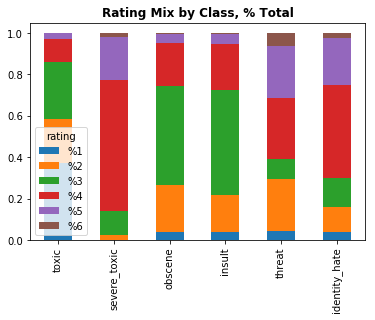

In [19]:
df_A2 = df_A1[['%1', '%2', '%3', '%4', '%5', '%6']]
df_A2.plot(kind='bar', stacked=True)
plt.title('Rating Mix by Class, % Total',fontweight='bold')

Text(0.5,1,'Mix by Rating, Quantity')

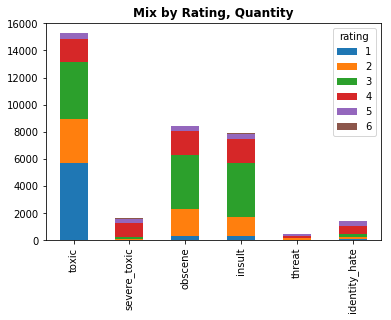

In [20]:
df_A3 = df_A1[[1,2,3,4,5,6]]
df_A3.plot(kind='bar', stacked=True)
plt.title('Mix by Rating, Quantity',fontweight='bold')

Text(0.5,1,'Mix by Rating, % Total')

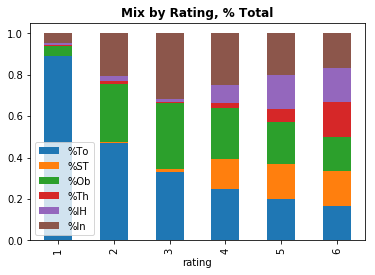

In [21]:
df_B = df_A[['%To', '%ST', '%Ob', '%Th', '%IH', '%In']]
df_B.plot(kind='bar', stacked=True)
plt.title('Mix by Rating, % Total',fontweight='bold')
# ax.set_ylabel("% Total",fontweight='bold')

Text(0.5,1,'Mix by Rating, Quantity')

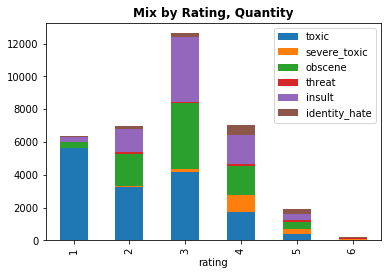

In [22]:
df_C = df_A[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

df_C.plot(kind='bar', stacked=True)
plt.title('Mix by Rating, Quantity',fontweight='bold')
# plt.set_ylabel("Quantity",fontweight='bold')

In [23]:
# df_C.plot(kind='bar', stacked=False)

Text(0.5,1,'Obscene by Rating')

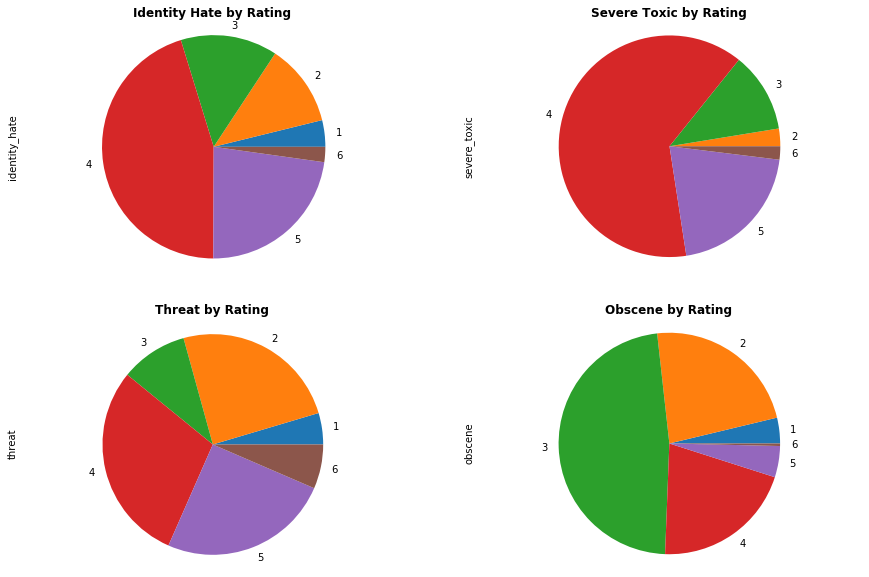

In [24]:
fig,ax = plt.subplots(figsize=(15,10),nrows=3,ncols=2)
ax = plt.subplot(221)
df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')
plt.title('Identity Hate by Rating',fontweight='bold')

ax = plt.subplot(222)
df_A.severe_toxic.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')
plt.title('Severe Toxic by Rating',fontweight='bold')

ax = plt.subplot(223)
df_A.threat.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')
plt.title('Threat by Rating',fontweight='bold')

ax = plt.subplot(224)
df_A.obscene.groupby(df_A.rating).sum().plot(kind='pie')
plt.axis('equal')
plt.title('Obscene by Rating',fontweight='bold')

# ax = plt.subplot(225)
# df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
# plt.axis('equal')

# ax = plt.subplot(226)
# df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie')
# plt.axis('equal')

In [25]:
# df_A.identity_hate.groupby(df_A.rating).sum().plot(kind='pie', figsize=(10,6))
# plt.axis('equal')
# # plt.savefig('../charts/ratingpie.png')
# plt.show()

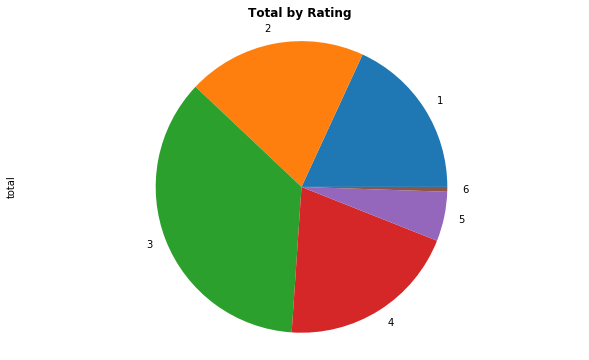

In [26]:
df_A.total.groupby(df_A.rating).sum().plot(kind='pie', figsize=(10,6))
plt.axis('equal')
plt.title('Total by Rating',fontweight='bold')
plt.savefig('../charts/ratingpie.png')
plt.show()

In [27]:
# sns.jointplot(x='rating',y='total', kind='reg',color='g',data=df_A,scatter_kws={'alpha':0.3})

In [28]:
df_D = df[['category','toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
df_D = df_D.groupby('category').sum()
df_D['total'] = df_D['toxic']+df_D['severe_toxic'] + df_D['obscene'] + df_D['threat']+df_D['insult']+df_D['identity_hate']
df_D['category'] = df_D.index

In [29]:
df_D = df_D.sort_values(['total'], ascending=[False])
df_D

,toxic,severe_toxic,obscene,threat,insult,identity_hate,total,category
category,,,,,,,,
ToObIn,3800,0,3800,0,3800,0,11400,ToObIn
To,5666,0,0,0,0,0,5666,To
ToSTObIn,989,989,989,0,989,0,3956,ToSTObIn
ToOb,1758,0,1758,0,0,0,3516,ToOb
ToObInIH,618,0,618,0,618,618,2472,ToObInIH
ToIn,1215,0,0,0,1215,0,2430,ToIn
ToSTObInIH,265,265,265,0,265,265,1325,ToSTObInIH
ToObThIn,131,0,131,131,131,0,524,ToObThIn
ToSTOb,158,158,158,0,0,0,474,ToSTOb


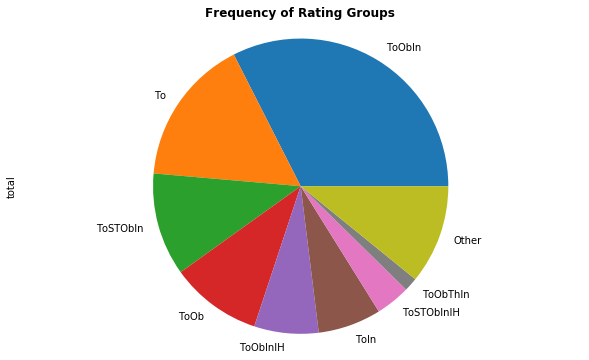

In [30]:
cutoff = 8
df_D0 = df_D['total']
df_D1 = df_D0.iloc[:cutoff]
df_D1.loc['Other'] = df_D0.iloc[cutoff:].sum()
df_D1.plot(kind='pie', figsize=(10,6))
plt.axis('equal')
plt.title('Frequency of Rating Groups',fontweight='bold')
plt.show()

In [31]:
df_E = df[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']]
df_E.corr().sort_values('toxic')

,toxic,severe_toxic,obscene,threat,insult,identity_hate
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009


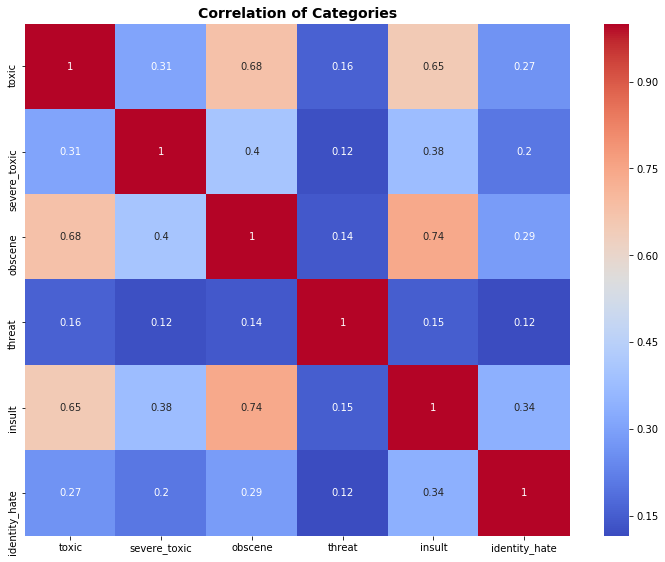

In [38]:
corr=df_E.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, 
            cmap = 'coolwarm')
plt.title('Correlation of Categories',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.savefig('../charts/catcorr.png')

In [ ]:
# df11 = df[df['toxic']==1]
# print(df11.shape)
# df11.columns

In [ ]:
# df11['rating'].mean()

In [ ]:
df.columns

In [ ]:
# categories = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']

# def average_rating_by_cat(data,categories):
#     averages_dict = {}
#     for cat in categories:
#         dt = data[data[cat]==1]
#         averages_dict[cat] = {"Rating": dt['rating'].mean(),"Min Polarity": df['polarity_min'].mean, 
#                               "Max Polarity":df['polarity_max'].mean(), 
#                               "Comment Polarity":df['polarity_comment'].mean(), 
#                               "Sentence Polarity":np.mean(df.polarity_sentence[0][-1]),
#                               "Character Count":df['char_count'].mean()}
#     return averages_dict

In [ ]:
# arbc = average_rating_by_cat(df,categories)
# arbc['clean']['Comment Polarity']

In [ ]:
# arbc['Rating']

In [ ]:
# arbc = pd.DataFrame(arbc)
# arbc

In [ ]:
# arbc[0]

In [ ]:
# arbc.sort_values().plot(kind='bar', stacked=True)

In [ ]:
# plt.title("Average Rating by Category",fontweight='bold')
# plt.set_ylabel("Average Rating",fontweight='bold')

### Remove Toxic class

In [ ]:
df_E0 = df[['category','severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
df_E0['adj_rating'] = df_E0['severe_toxic'] + df_E0['obscene'] + df_E0['threat'] + df_E0['insult'] + df_E0['identity_hate']
df_E0 = df_E0[df_E0['adj_rating']>0]
df_E0['total'] = df_E0['severe_toxic'] + df_E0['obscene'] + df_E0['threat']+df_E0['insult']+df_E0['identity_hate']
df_E = df_E0.groupby('adj_rating').sum()
df_E

In [ ]:
df_E['%ST'] = df_E['severe_toxic'] / df_E['total']
df_E['%Ob'] = df_E['obscene'] / df_E['total']
df_E['%Th'] = df_E['threat'] / df_E['total']
df_E['%IH'] = df_E['identity_hate'] / df_E['total']
df_E['%In'] = df_E['insult'] / df_E['total']
df_E['adj_rating'] = df_E.index

df_E

In [ ]:
df_E.total.plot(kind='bar')

In [ ]:
df_E1 = df_E[['%ST', '%Ob', '%Th', '%IH', '%In']]

df_E1.plot(kind='bar', stacked=True)

In [ ]:
df_E2 = df_E[['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

df_E2.plot(kind='bar', stacked=True)

In [ ]:
# df_E2.plot(kind='bar', stacked=False)

In [ ]:
fig,ax = plt.subplots(figsize=(15,10),nrows=3,ncols=2)
ax = plt.subplot(221)
df_E.identity_hate.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(222)
df_E.threat.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(223)
df_E.severe_toxic.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

ax = plt.subplot(224)
df_E.obscene.groupby(df_E.adj_rating).sum().plot(kind='pie')
plt.axis('equal')

In [ ]:
df_E2